----
# analisi dati in Python

----

Oggi vedremo quali siano le possibilità fornite dal linguaggio Python per l'analisi dati. Non entrerò nel dettaglio delle potenzialità delle singole librerie, ma mi limiterò soltanto a darvene un'assaggio per farvi rendere conto delle potenzialità. Tutte le librerie di cui vi parlerò sono ampiamente testate e *production-ready*, nonchè guidati da sviluppatori attivi ed una comunità pronta a dare una mano.

Potete trovare questa lezione (ed altre) sul mio sito github:

https://github.com/EnricoGiampieri/lezionipython

In generale, quando ci prepariamo a fare dell'analisi dati, possiamo dividere il nostro lavoro concettualmente in tre fasi:

- preparazione, pulizia e normalizzazione dei dati
- creazione ed esplorazione dei modelli
- test dei risultati

La prima parte viene gestita dalla libreria **pandas**, mentre la terza è affidata principalmente al buon senso ed all'esperienza. Per quanto rigurda la fase centrale, la più interessante, vi parlerò di tre librerie che a mio parere sono le punte di diamante dell'analisi dati in python, pur essendo lontane dall'essere le uniche.

Queste tre librerie rappresentano i tre principali metodi disponibili in python per tre differenti approcci ai dati. Questi tre approcci condividono moltissime caratteristiche ed una distinzione precisa risulta impossibile.

- il **machine learning** si preoccupa soprattutto di creare delle "macchine" che siano in grado di **prevedere** dei dati. Ad esempio siano in grado di prevedere l'evolvere di una malattia date le caratteristiche del paziente. Questo approccio non si preoccupa molto di quale sia la maniera in cui si arriva al risultato, ed è spesso una maniera di lavorare che sfrutta le cosiddette **black-box**, ovvero macchine il cui funzionamento non è facilmente comprensibile in termini umani. Il risultato classico di questo approccio è una macchina di previsione di cui sia nota la capacità di previsione (quante volte indica la risposta corretta). Esempi classici sono le reti neurali e le support vector machine
- la **statistica inferenziale** cerca invece di descrivere un modello a partire dai dati, e si preoccupa molto dell'interpretabilità delle componenti del modello stesso, della loro significatività e della loro interazione. Il risultato delle procedure è un modello (con relativa interpretazione) del quale sia specificato il p-value, ovvero il grado di significatività (quanto è plausibile che il modello stia descrivendo fornendo informazioni sui dati), sia a livello di intero modello che di singole componenti. Tipici esempi sono i fit lineari o i fit logistici.
- la **statistica bayesiana** invece si preoccupa dell'adattamento di un singolo modello ad dei dati andando da definire non un p-value bensì una distribuzione di probabilità congiunta per tutti i parametri che descrivono quel modello. Questo caratterizza quindi la bontà del modello in termini di precisione di queste distribuzioni. È un metodo computazionalmente oneroso che ha però il vantaggio di permettere di inserire la conoscenza a priori possieduta sui dati, ad esempio analizzando il risultato di un sintomo medico in termini della frequenza delle varie malattie che possono dare quel sintomo.

Per la statistica inferenziale vedremo **statsmodels**, per il machine learning vedremo **scikits.learn** mentre per la statistica bayesiana utilizzeremo **pymc**.

Ricordatevi che tutte queste librerie vi forniscono vari metodi di analizzare i dati, ed altrettanti per impiccarvi da soli. Scegliere il giusto modello da applicare di caso in caso e, soprattutto, testare che i risultati del modello scelto siano sensati e non della spazzatura richiedono un lavoro meticoloso di test sia dei dati in ingresso che dei dati in uscita.

**Ricordate sempre che se date in pasto al computer dati o modelli spazzatura, non avrete che spazzatura in uscita.**

Ognuna di queste librerie fornisce metodi di diagnostica dei risultati, ma come sempre è necessaria l'applicazione di una buona dose di buon senso, pazienza e meticolosità.

----
## Installare le librerie

le librerie che sono necessarie per riprodurre questa lezione, oltre a quelle già citate, sono:

- *numpy*, che fornisce la struttura dati degli array numerici multidimensionali ed è la base di tutto il calcolo scientifico in python
- *scipy*, che contiene moltissime funzioni di calcolo scientifico applicare agli array di numpy
- *matplotlib*, che fornisce le routine di visualizzazione grafica
- *ipython*, che è il programma che permette di creare questi notebook misti HTML/codice

Per installare tutte le librerie si puà sfruttare il programma pip, che permette di scaricare e compilare tutte le librerie python richieste e le loro dipendenze. Sotto ubuntu posso ottenere tutto il necessario con le seguenti righe di codice:

    sudo apt-get install python-pip build-essential

    sudo pip install -U numpy
    sudo pip install -U scipy
    sudo pip install -U matplotlib
    sudo pip install -U ipython
    sudo pip install -U pandas
    sudo pip install -U seaborn
    sudo pip install -U patsy
    sudo pip install -U statsmodels
    sudo pip install -U scikit-learn
    sudo pip install -U pymc

Una maniera più smeplice per procurarsi (quasi) tutto il necessario è richiedere un'account accademico alla Entought per scaricare la Enthought Python Distribution (EPD, http://www.enthought.com/products/epd.php), un pacchetto che racchiude molte delle librerie più famose di python già predisposte a funzionare per il sistema di riferimento.

In ogni caso sono sempre disponibile per dare una mano con l'installazione e la configurazione :)

----
# Pandas - Gestione di Dataframe

http://pandas.pydata.org/

Pandas è una libreria molto potente per la **gestione** dei dati, ovvero lettura e manipolazione in preparazione di una successiva elaborazione.

In [31]:
import pandas as pd
import pandas
%matplotlib inline

Pandas è composto da due oggetti fondamentali, la **Series** ed il **DataFrame**. La *Series* è un insieme ordinato di coppie chiave-valore, in cui il tipo di valori è omogeneo 

In [2]:
serie = pd.Series([1,2,3,4], ['a', 'b', 'c', 'd'])
serie

a    1
b    2
c    3
d    4
dtype: int64

Ogni Serie possiede un indice e dei valori, rappresentati internamente come un array numpy, ed ha associato quindi anche il tipo di dati contenuti dentro l'array

In [4]:
print(serie.index)
print(serie.values)
print(serie.dtype)

Index(['a', 'b', 'c', 'd'], dtype='object')
[1 2 3 4]
int64


Diverse funzioni statistiche (di cui qui sono sono rappresentate sono una minima parte) sono disponibili sulla serie, ed inoltre quasi tutte le funzioni delle librerie numpy, scipy e matplotlib funzionano egregiamente

In [5]:
print(serie.mean())
print(serie.sum())
print(serie.min())

2.5
10
1


È possibile ottenere gli elementi della serie in varie maniere, sia tramite indicizzazione diretta che tramite condizioni logiche

In [6]:
serie['a']

1

In [7]:
serie > 2

a    False
b    False
c     True
d     True
dtype: bool

In [8]:
a = serie[serie>2]
a

c    3
d    4
dtype: int64

Una delle funzioni però più utili delle Serie è la capacità di allineare direttamente gli indici di due serie differenti. Se ho ad esempio una serie con indici in parziale sovrapposizione con quelli della mia serie iniziale, posso compiere operazioni come somma e prodotti e pandas si occuperà automaticamente di sommare gli indici giusti fra di loro

In [9]:
serie2 = pd.Series([5, 6, 9], ['a', 'c', 'e'])
serie2

a    5
c    6
e    9
dtype: int64

In [10]:
serie+serie2

a     6
b   NaN
c     9
d   NaN
e   NaN
dtype: float64

In [11]:
serie.add(serie2, fill_value=0)

a    6
b    2
c    9
d    4
e    9
dtype: float64

----
Un **DataFrame** rappresenta invece una tabella di dati, divisi in colonne di tipo omogeneo che condividono un'indicizzazione per riga. Ogni colonna è rappresentata da una serie, e quindi il DataFrame eredita naturalmente le capacità di allineamento delle serie.

In [12]:
pd.DataFrame({'A': [1, 2, 3], 'B': [4, 5, 6], 'C':[7, 8, 9]}, 
            index=["one", "two", "three"])

,A,B,C
one,1,4,7
two,2,5,8
three,3,6,9


In [13]:
data = [[1, 2, 3], [4, 5, 6], [7, 8, 9]]
dataframe = pd.DataFrame(data, index=['one', 'two', 'three'], columns=["A", "B", "C"])
dataframe

,A,B,C
one,1,2,3
two,4,5,6
three,7,8,9


È possibile accedere alle colonne di un dataframe come se fosse un dizionario (in modo quindi simile a quanto visto con le serie)

In [14]:
dataframe['A']

one      1
two      4
three    7
Name: A, dtype: int64

In [15]:
dataframe['A']['one']

1

**pandas** possiede delle eccezionali routines di lettura, estremamente rapide, robuste e configurabili. Permette di leggere file di testo, excel, ma anche tabelle HDF5, stata, ed addirittura scaricare direttamente dei dataset online, formattando anche le tabelle html presenti nelle varie pagine.

In [143]:
res = pd.read_html('https://en.wikipedia.org/wiki/List_of_United_States_cities_by_population',
                  header=0)

In [145]:
res[3].set_index('2014 rank').head()

,City,State[5],2014 estimate,2010 Census,Change,2014 land area,2010 population density,Location
2014 rank,,,,,,,,
1,New York[6],New York,8491079,8175133,7000386471999905080♠+3.86%,7002302600000000000♠302.6 sq mi 783.8 km2,"7004270120000000000♠27,012 per sq mi 10,430 km−2",40°39′51″N 73°56′19″W﻿ / ﻿40.6643°N 73.9385°W﻿...
2,Los Angeles,California,3928864,3792621,7000359231781926010♠+3.59%,"7002468700000000000♠468.7 sq mi 1,213.9 km2","7003809200000000000♠8,092 per sq mi 3,124 km−2",34°01′10″N 118°24′39″W﻿ / ﻿34.0194°N 118.4108°...
3,Chicago,Illinois,2722389,2695598,6999993879651194280♠+0.99%,7002227600000000000♠227.6 sq mi 589.6 km2,"7004118420000000000♠11,842 per sq mi 4,572 km−2",41°50′15″N 87°40′54″W﻿ / ﻿41.8376°N 87.6818°W﻿...
4,Houston[7],Texas,2239558,2100263,7000663226462590640♠+6.63%,"7002599600000000000♠599.6 sq mi 1,552.9 km2","7003350100000000000♠3,501 per sq mi 1,352 km−2",29°46′50″N 95°23′11″W﻿ / ﻿29.7805°N 95.3863°W﻿...
5,Philadelphia[8],Pennsylvania,1560297,1526006,7000224710780953680♠+2.25%,7002134100000000000♠134.1 sq mi 347.3 km2,"7004113790000000000♠11,379 per sq mi 4,394 km−2",40°00′34″N 75°08′00″W﻿ / ﻿40.0094°N 75.1333°W﻿...


----
## gestione di un dataframe reale

Vediamo ora come usare Pandas per gestire un dataset reale, tratto dall'articolo 

    Fair, Ray. 1978. "A Theory of Extramarital Affairs" 
    "Journal of Political Economy", February, 45-61.

Possiamo importare questo dataset dalla libreria statsmodels, di cui ci occuperemo a breve

In [16]:
import statsmodels.api as sm
print(sm.datasets.fair.SOURCE)
print(sm.datasets.fair.DESCRLONG)
print(sm.datasets.fair.NOTE)
print(sm.datasets.fair.COPYRIGHT)


Fair, Ray. 1978. "A Theory of Extramarital Affairs," `Journal of Political
    Economy`, February, 45-61.

The data is available at http://fairmodel.econ.yale.edu/rayfair/pdf/2011b.htm

Extramarital affair data used to explain the allocation
of an individual's time among work, time spent with a spouse, and time
spent with a paramour. The data is used as an example of regression
with censored data.
::

    Number of observations: 6366
    Number of variables: 9
    Variable name definitions:

        rate_marriage   : How rate marriage, 1 = very poor, 2 = poor, 3 = fair,
                        4 = good, 5 = very good
        age             : Age
        yrs_married     : No. years married. Interval approximations. See
                        original paper for detailed explanation.
        children        : No. children
        religious       : How relgious, 1 = not, 2 = mildly, 3 = fairly,
                        4 = strongly
        educ            : Level of education, 9 = grade 

Carichiamo il dataset come DataFrame di pandas e possiamo ottenere un riassunto del contenuto richiedendone la stampa. Vedo subito che ho 6366 campioni (ovvero soggetti intervistati) di cui possiedo diverse informazioni.

In [17]:
affair = sm.datasets.fair.load_pandas().data
print(affair)

      rate_marriage   age  yrs_married  children  religious  educ  occupation  \
0                 3  32.0          9.0       3.0          3    17           2   
1                 3  27.0         13.0       3.0          1    14           3   
2                 4  22.0          2.5       0.0          1    16           3   
3                 4  37.0         16.5       4.0          3    16           5   
4                 5  27.0          9.0       1.0          1    14           3   
5                 4  27.0          9.0       0.0          2    14           3   
6                 5  37.0         23.0       5.5          2    12           5   
7                 5  37.0         23.0       5.5          2    12           2   
8                 3  22.0          2.5       0.0          2    12           3   
9                 3  27.0          6.0       0.0          1    16           3   
10                2  27.0          6.0       2.0          1    16           3   
11                5  27.0   

In [18]:
affair[:4]

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3,32,9.0,3,3,17,2,5,0.111111
1,3,27,13.0,3,1,14,3,4,3.230769
2,4,22,2.5,0,1,16,3,5,1.400000
3,4,37,16.5,4,3,16,5,5,0.727273


----
I dati forniti sono puramente numerici, li trasformo in categorie di testo mnemoniche secondo le indicazioni fornite dal dataset. Usiamo dei dizionari e la funzione *apply* delle serie, che applica una funzione data a tutti gli elementi della serie

In [19]:
rate_marriage = {1: '1 very poor', 2: '2 poor', 3: '3 fair', 
    4: '4 good', 5: '5 very good'}
affair['rate_marriage'] = affair['rate_marriage'].apply(lambda s: rate_marriage[s])

In [20]:
religious = {1: '1 not', 2: '2 mildly', 3: '3 fairly', 4: '4 strongly'}
affair['religious'] = affair['religious'].apply(lambda s: religious[s])

In [21]:
occupation = {1: 'student', 
    2: 'farming, agriculture; semi-skilled, or unskilled worker', 
    3: 'white-colloar' ,
    4: ('teacher counselor social worker, nurse; artist, writers; '
        'technician, skilled worker'), 
    5: 'managerial, administrative, business', 
    6: 'professional with advanced degree'}
affair['occupation'] = affair['occupation'].apply(lambda s: occupation[s])
affair['occupation_husb'] = affair['occupation_husb'].apply(lambda s: occupation[s])

Creo inoltre una nuova colonna con un'informazione binaria sul fatto che la persona abbia tradito o meno

In [22]:
affair['cheated'] = affair.affairs > 0

In [23]:
affair[:4]

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,cheated
0,3 fair,32,9.0,3,3 fairly,17,"farming, agriculture; semi-skilled, or unskill...","managerial, administrative, business",0.111111,True
1,3 fair,27,13.0,3,1 not,14,white-colloar,"teacher counselor social worker, nurse; artist...",3.230769,True
2,4 good,22,2.5,0,1 not,16,white-colloar,"managerial, administrative, business",1.400000,True
3,4 good,37,16.5,4,3 fairly,16,"managerial, administrative, business","managerial, administrative, business",0.727273,True


----
Il DataFrame ossiede moltissimi metodi statistici (media, varianza, mediana, covarianza, correlazione, etc...) sia normali che cumulativi, con finestra o incrementali

In [24]:
affair.describe()

,age,yrs_married,children,educ,affairs,cheated
count,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366
mean,29.082862,9.009425,1.396874,14.209865,0.705374,0.322495
std,6.847882,7.280120,1.433471,2.178003,2.203374,0.467468
min,17.500000,0.500000,0.000000,9.000000,0.000000,False
25%,22.000000,2.500000,0.000000,12.000000,0.000000,0
50%,27.000000,6.000000,1.000000,14.000000,0.000000,0
75%,32.000000,16.500000,2.000000,16.000000,0.484848,1
max,42.000000,23.000000,5.500000,20.000000,57.599991,True


In [25]:
affair.mean()

age            29.082862
yrs_married     9.009425
children        1.396874
educ           14.209865
affairs         0.705374
cheated         0.322495
dtype: float64

In [26]:
affair.corr()

,age,yrs_married,children,educ,affairs,cheated
age,1.000000,0.894082,0.673902,0.027960,-0.089964,0.146519
yrs_married,0.894082,1.000000,0.772806,-0.109058,-0.087737,0.203109
children,0.673902,0.772806,1.000000,-0.141918,-0.070278,0.159833
educ,0.027960,-0.109058,-0.141918,1.000000,-0.017740,-0.075280
affairs,-0.089964,-0.087737,-0.070278,-0.017740,1.000000,0.464046
cheated,0.146519,0.203109,0.159833,-0.075280,0.464046,1.000000


----
È disponibile una potente funzione di raggruppamento, in modo da poter dividere per categorie i dati e farci sopra delle operazioni sulla base di queste categorie

In [27]:
affair.groupby(['religious', 'rate_marriage']).mean()

age  yrs_married  children       educ  \
religious  rate_marriage                                                
1 not      1 very poor    32.000000    10.916667  1.777778  14.166667   
           2 poor         30.482143    10.696429  1.500000  14.464286   
           3 fair         28.247191     8.058989  1.157303  14.275281   
           4 good         27.476879     7.156069  1.014451  14.471098   
           5 very good    27.111111     6.832151  0.923168  14.496454   
2 mildly   1 very poor    31.736111    12.138889  2.291667  13.472222   
           2 poor         30.130137    10.592466  1.698630  13.719178   
           3 fair         29.625935    10.034913  1.600998  13.810474   
           4 good         28.490419     8.708982  1.353293  13.819162   
           5 very good    27.875736     7.457597  1.087750  14.297998   
3 fairly   1 very poor    35.552632    16.210526  2.460526  13.710526   
           2 poor         30.272727    10.404959  1.723140  13.595041   
           3 fair         30.812500    11.037791  1.831395  14.020349   
           4 good         29.186431     8.911631  1.412201  14.246294   
           5 very good    29.106046     8.989923  1.387236  14.251440   
4 strongly 1 very poor    39.857143    18.285714  2.928571  15.714286   
           2 poor         33.400000    13.140000  2.540000  14.680000   
           3 fair         32.721429    13.028571  2.128571  14.300000   
           4 good         31.540761    11.978261  1.907609  14.521739   
           5 very good    30.355405    10.052703  1.629730  14.940541   

                           affairs   cheated  
religious  rate_marriage                      
1 not      1 very poor    1.334104  0.666667  
           2 poor         3.299485  0.714286  
           3 fair         2.382038  0.617978  
           4 good         1.005887  0.375723  
           5 very good    0.691137  0.274232  
2 mildly   1 very poor    1.448427  0.777778  
           2 poor         1.603516  0.684932  
           3 fair         1.305844  0.553616  
           4 good         0.770306  0.368862  
           5 very good    0.337247  0.189635  
3 fairly   1 very poor    0.992806  0.763158  
           2 poor         1.087526  0.586777  
           3 fair         1.066625  0.534884  
           4 good         0.531323  0.280502  
           5 very good    0.305064  0.169866  
4 strongly 1 very poor    0.725943  0.714286  
           2 poor         0.472174  0.400000  
           3 fair         0.673102  0.442857  
           4 good         0.303108  0.217391  
           5 very good    0.102562  0.089189

In [28]:
affair.groupby(['religious', 'rate_marriage']).mean().ix['4 strongly']

,age,yrs_married,children,educ,affairs,cheated
rate_marriage,,,,,,
1 very poor,39.857143,18.285714,2.928571,15.714286,0.725943,0.714286
2 poor,33.400000,13.140000,2.540000,14.680000,0.472174,0.400000
3 fair,32.721429,13.028571,2.128571,14.300000,0.673102,0.442857
4 good,31.540761,11.978261,1.907609,14.521739,0.303108,0.217391
5 very good,30.355405,10.052703,1.629730,14.940541,0.102562,0.089189


I metodi di rimodellamento dei dataframe sono estremamente potenti e pandas ne offre un'ampia collezione:

- groupby
- pivoting
- stack / unstack
- melting
- cross tabulazione
- tiling, merging, concatenazione

È possibile selezionare soltanto una parte dei soggetti tramite l'indicizzazione binaria, in questo caso facendo una statistica solo su coloro che hanno tradito almeno una volta

In [29]:
affair[affair.cheated].groupby(['religious', 'rate_marriage']).mean()

age  yrs_married  children       educ  \
religious  rate_marriage                                                
1 not      1 very poor    32.000000    12.541667  1.666667  13.833333   
           2 poor         29.875000    10.250000  1.350000  14.450000   
           3 fair         28.781818     8.877273  1.277273  14.281818   
           4 good         28.738462     8.807692  1.253846  14.407692   
           5 very good    29.155172     9.586207  1.323276  14.275862   
2 mildly   1 very poor    33.071429    13.357143  2.500000  13.321429   
           2 poor         30.605000    11.450000  1.845000  13.710000   
           3 fair         30.288288    11.155405  1.810811  13.662162   
           4 good         29.813312    10.493506  1.647727  13.714286   
           5 very good    30.201863    10.658385  1.562112  14.229814   
3 fairly   1 very poor    35.620690    16.310345  2.258621  13.793103   
           2 poor         30.739437    11.492958  1.816901  13.408451   
           3 fair         31.051630    11.766304  1.929348  14.038043   
           4 good         31.006098    11.711382  1.861789  13.821138   
           5 very good    31.152542    11.598870  1.689266  14.101695   
4 strongly 1 very poor    40.000000    18.400000  2.700000  15.400000   
           2 poor         36.000000    15.150000  2.700000  15.700000   
           3 fair         32.661290    14.274194  2.370968  13.741935   
           4 good         32.750000    15.112500  2.400000  14.075000   
           5 very good    33.969697    14.545455  2.621212  15.000000   

                           affairs cheated  
religious  rate_marriage                    
1 not      1 very poor    2.001155    True  
           2 poor         4.619279    True  
           3 fair         3.854571    True  
           4 good         2.677208    True  
           5 very good    2.520268    True  
2 mildly   1 very poor    1.862264    True  
           2 poor         2.341133    True  
           3 fair         2.358753    True  
           4 good         2.088330    True  
           5 very good    1.778400    True  
3 fairly   1 very poor    1.300918    True  
           2 poor         1.853389    True  
           3 fair         1.994125    True  
           4 good         1.894188    True  
           5 very good    1.795915    True  
4 strongly 1 very poor    1.016320    True  
           2 poor         1.180434    True  
           3 fair         1.519907    True  
           4 good         1.394295    True  
           5 very good    1.149939    True

è possibile inoltre effettuare una prima esplorazione dei dati sfruttando i metodi di **seaborn**

In [39]:
import pylab as plt
import seaborn

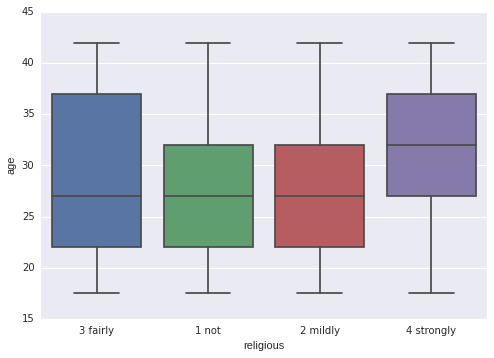

In [60]:
seaborn.boxplot(x="religious", y="age", data=affair);

/home/PERSONALE/enrico.giampieri2/.local/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


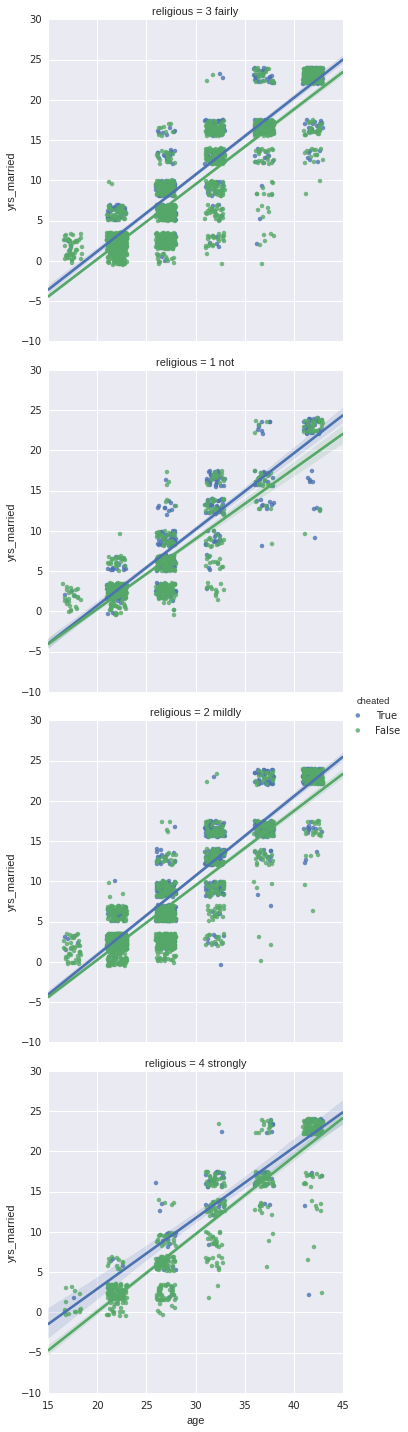

In [75]:
seaborn.lmplot(x='age',
               y='yrs_married',
               hue='cheated',
               row='religious',
               data=affair,
               x_jitter=1,
               y_jitter=1,
              )

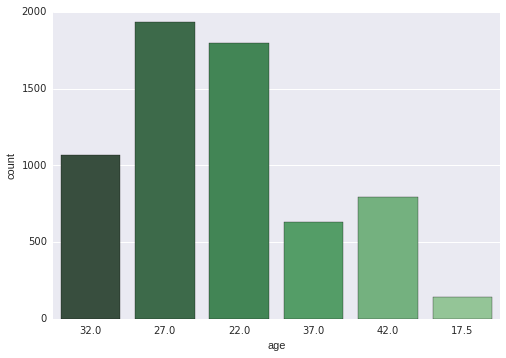

In [76]:
seaborn.countplot(x="age", data=affair, palette="Greens_d")

----
# statsmodels - statistica classica

http://statsmodels.sourceforge.net/

Statsmodels contiene tutti i metodi necessari per l'implementazione della statistica inferenziale classica. Tutti i metodi e le classi esposte sono state validate con i risultati forniti da R e STATA. L'utilizzo principale è la scelta di uno dei vari regressori possibili, fittarlo sui dati e ricavarne informazioni sul modelle scelto. Vi mostrerò soltanto la classica regressione ai minimi quadrati, chiamata OLS (Ordinary Least Square).

In [77]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [78]:
longley = sm.datasets.longley.load_pandas()
exog = longley.exog
endog = longley.endog
longley = longley.data

print(sm.datasets.longley.SOURCE)
print(sm.datasets.longley.DESCRLONG)
print(sm.datasets.longley.NOTE)
print(sm.datasets.longley.COPYRIGHT)
longley


The classic 1967 Longley Data

http://www.itl.nist.gov/div898/strd/lls/data/Longley.shtml

::

    Longley, J.W. (1967) "An Appraisal of Least Squares Programs for the
        Electronic Comptuer from the Point of View of the User."  Journal of
        the American Statistical Association.  62.319, 819-41.

The Longley dataset contains various US macroeconomic
variables that are known to be highly collinear.  It has been used to appraise
the accuracy of least squares routines.
::

    Number of Observations - 16

    Number of Variables - 6

    Variable name definitions::

            TOTEMP - Total Employment
            GNPDEFL - GNP deflator
            GNP - GNP
            UNEMP - Number of unemployed
            ARMED - Size of armed forces
            POP - Population
            YEAR - Year (1947 - 1962)

This is public domain.


,TOTEMP,GNPDEFL,GNP,UNEMP,ARMED,POP,YEAR
0,60323,83.0,234289,2356,1590,107608,1947
1,61122,88.5,259426,2325,1456,108632,1948
2,60171,88.2,258054,3682,1616,109773,1949
3,61187,89.5,284599,3351,1650,110929,1950
4,63221,96.2,328975,2099,3099,112075,1951
5,63639,98.1,346999,1932,3594,113270,1952
6,64989,99.0,365385,1870,3547,115094,1953
7,63761,100.0,363112,3578,3350,116219,1954
8,66019,101.2,397469,2904,3048,117388,1955
9,67857,104.6,419180,2822,2857,118734,1956


Possiamo visualizzare l'andamente nel tempo dell'occupazione complessiva e confrontarla con quella di un'altra variabile, ad esempio la deflazione del GNP

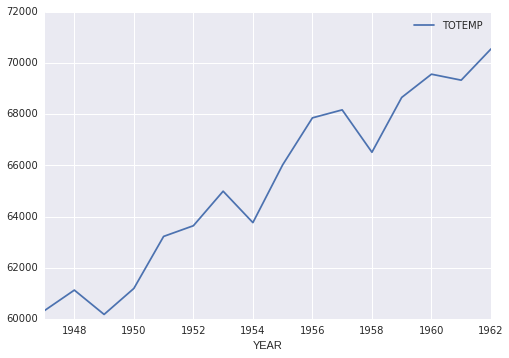

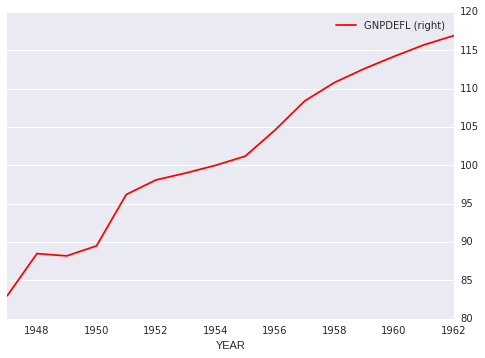

In [79]:
longley.plot('YEAR', 'TOTEMP')
longley.plot('YEAR', 'GNPDEFL', secondary_y=True, color='r');

Possiamo avere una visione d'insieme usando le funzioni fornite da pandas per l'analisi e la visualizzazione

In [80]:
longley.corr()

,TOTEMP,GNPDEFL,GNP,UNEMP,ARMED,POP,YEAR
TOTEMP,1.000000,0.970899,0.983552,0.502498,0.457307,0.960391,0.971329
GNPDEFL,0.970899,1.000000,0.991589,0.620633,0.464744,0.979163,0.991149
GNP,0.983552,0.991589,1.000000,0.604261,0.446437,0.991090,0.995273
UNEMP,0.502498,0.620633,0.604261,1.000000,-0.177421,0.686552,0.668257
ARMED,0.457307,0.464744,0.446437,-0.177421,1.000000,0.364416,0.417245
POP,0.960391,0.979163,0.991090,0.686552,0.364416,1.000000,0.993953
YEAR,0.971329,0.991149,0.995273,0.668257,0.417245,0.993953,1.000000


/home/PERSONALE/enrico.giampieri2/.local/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


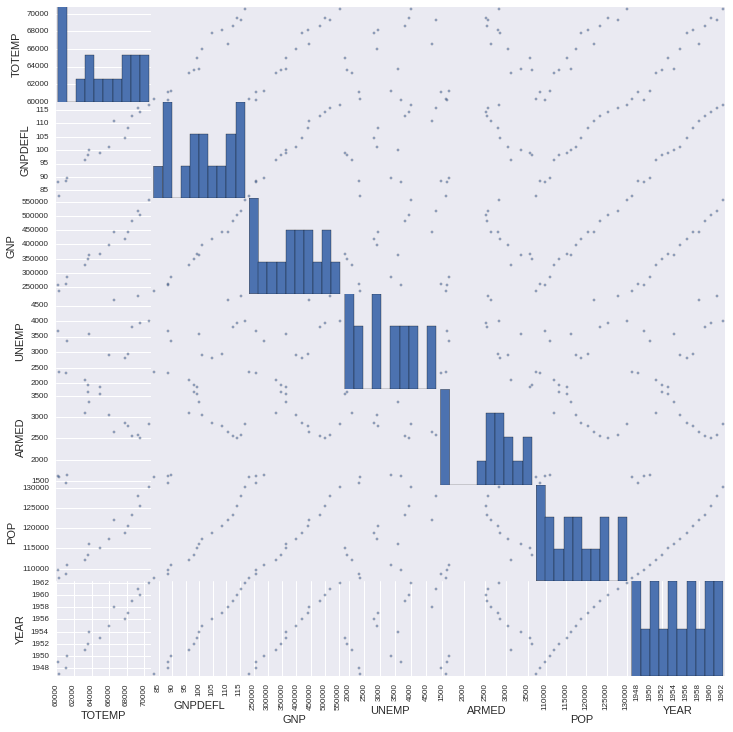

In [81]:
pd.scatter_matrix(longley, figsize=(12,12));

E possiamo investigare le correlazioni fra le singole variabili e ciò che stiamo cercando di modellizzare:

In [82]:
longley.corrwith(longley['TOTEMP']).order()

/usr/local/lib/python3.4/dist-packages/ipykernel/__main__.py:1: FutureWarning: order is deprecated, use sort_values(...)
  if __name__ == '__main__':


ARMED      0.457307
UNEMP      0.502498
POP        0.960391
GNPDEFL    0.970899
YEAR       0.971329
GNP        0.983552
TOTEMP     1.000000
dtype: float64

Creare un modello lineare è molto semplice, basta dare al regressore scelto il vettore su cui fare la regressione (la y) e tutti i vettori da usare come regressori (le x).

Tutte le classi di regressione hanno un metoto **summary** che restituisce una diagnostica molto approfondita del modello.

In [83]:
y, x = endog, exog
res1 = sm.OLS(y, x).fit()
res1.summary()

/usr/local/lib/python3.4/dist-packages/scipy/stats/stats.py:1285: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 TOTEMP   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 5.052e+04
Date:                Fri, 30 Oct 2015   Prob (F-statistic):           8.20e-22
Time:                        10:02:28   Log-Likelihood:                -117.56
No. Observations:                  16   AIC:                             247.1
Df Residuals:                      10   BIC:                             251.8
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
GNPDEFL      -52.9936    129.545     -0.409      0.691      -341.638   235.650
GNP            0.0711      0.030      2.356      0.040         0.004     0.138
UNEMP         -0.4235      0.418     -1.014      0.335        -1.354     0.507
ARMED         -0.5726      0.279     -2.052      0.067        -1.194     0.049
POP           -0.4142      0.321     -1.289      0.226        -1.130     0.302
YEAR          48.4179     17.689      2.737      0.021         9.003    87.832
==============================================================================
Omnibus:                        1.443   Durbin-Watson:                   1.277
Prob(Omnibus):                  0.486   Jarque-Bera (JB):                0.605
Skew:                           0.476   Prob(JB):                        0.739
Kurtosis:                       3.031   Cond. No.                     4.56e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.56e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Una maniera molto più comoda per creare i modelli è l'interfaccia a formula, che utilizza una sintassi identica a quella stabilita da molto tempo da programmi come R, S e Stata. In Statsmodels questo è implementato tramite una stringa che descrive il modello ed un dataframe su cui questa formula viene valutata.

Con questa sintassi si separa la variabile dipendente da quelle indipendenti con una tilde (~) e la combinazione delle variabili indipendenti indica la struttura del modello:

- la somma **+** rappresenta la combinazione dei due fattori in modo indipendente
- la moltiplicazione __*__ rappresenta la combinazione tenendo conto delle interazioni
- i due punti __:__ rappresentano la combinazione gerarchica dei due fattori

Vediamo un esempio di modello elementare

In [84]:
res2 = smf.ols('TOTEMP ~ GNPDEFL', longley).fit()
res2.summary()

/usr/local/lib/python3.4/dist-packages/scipy/stats/stats.py:1285: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 TOTEMP   R-squared:                       0.943
Model:                            OLS   Adj. R-squared:                  0.939
Method:                 Least Squares   F-statistic:                     230.1
Date:                Fri, 30 Oct 2015   Prob (F-statistic):           4.39e-10
Time:                        10:02:35   Log-Likelihood:                -129.94
No. Observations:                  16   AIC:                             263.9
Df Residuals:                      14   BIC:                             265.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept   3.319e+04   2129.189     15.588      0.000      2.86e+04  3.78e+04
GNPDEFL      315.9661     20.830     15.169      0.000       271.290   360.642
==============================================================================
Omnibus:                        0.055   Durbin-Watson:                   1.896
Prob(Omnibus):                  0.973   Jarque-Bera (JB):                0.114
Skew:                          -0.073   Prob(JB):                        0.945
Kurtosis:                       2.613   Cond. No.                     1.00e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large,  1e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Un test aggiuntivo che possiamo fare separatamente è il rainbow test per la linearità, che ci fornisce una stima se i residui del modello sono compatibili con quelli attesi da un modello lineare (permettendo di identificare eventuali componenti non-lineari).

In [85]:
from statsmodels.stats.diagnostic import linear_rainbow
fstats, pvalue = linear_rainbow(res2)
print("p-value dell'ipotesi di linearità dei residui:", pvalue)

p-value dell'ipotesi di linearità dei residui: 0.981815445326


Posso a questo punto confrontare due modelli lineari tramite un'**anova** fra di loro per vedere se sono significativamente diversi. Devo confrontare il modello più semplice contro quello più complicato per vedere se il secondo aggiunge qualcosa di nuovo.

In questo caso vediamo che l'aggiunta di tutti i regressori disponibili (il primo modello che abbiamo descritto) aggiunga effettivamente informazione significativa, avendo un p-value $\sim 4 \cdot 10^{-3}$

In [86]:
from statsmodels.stats.anova import anova_lm
anova_lm(res2, res1)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,14,10611376.220872,0,NaN,NaN,NaN
1,10,2257822.599758,4,8353553.621115,9.249568,0.002153


In effetti possiamo vedere dal grafico del modello che i dati sono in buon accordo con il modello anche nel caso più semplice.

/home/PERSONALE/enrico.giampieri2/.local/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


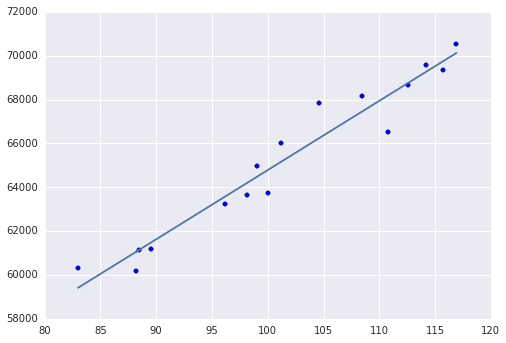

In [88]:
plt.scatter(longley['GNPDEFL'], longley['TOTEMP'])
plt.plot(longley['GNPDEFL'], res2.fittedvalues);

Per confrontare i due modelli, visto che la visualizzazione dei modelli multidimensionali è abbastanza difficile, è possibile confrontare esteticamente i residui del modello, definiti come la differenza fra il valore previsto e quello osservato.

Vediamo immediatamente come i residui del secondo modello siano nettamente meno variabili di quelli del primo, indice della maggior precisione del modello.

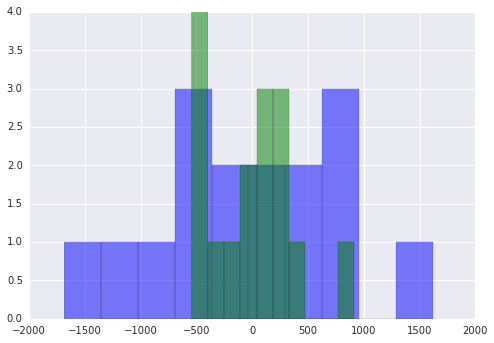

In [146]:
res2.resid.hist(color='b', alpha=0.5)
res1.resid.hist(color='g', alpha=0.5)

La verifica della linearità del modello è effettuabile anche visivamente facendo il plot dei residui, e constatando che il fit dei residui è sostanzialmente piatto

pendenza dei residui,  valore 1.82524590402
pendenza dei residui, p-value 0.940085366703


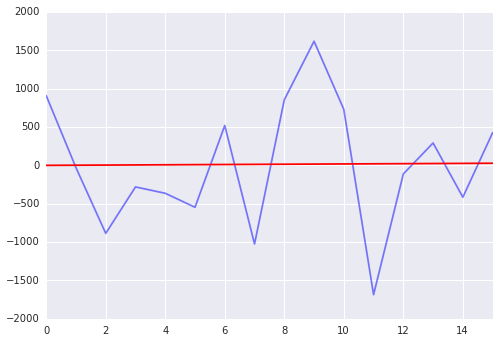

In [90]:
res2.resid.plot(alpha=0.5, color='b')
model_res2 = sm.OLS(res2.resid, res2.resid.index).fit()
print("pendenza dei residui,  valore", model_res2.params['x1'])
print("pendenza dei residui, p-value", model_res2.pvalues['x1'])
fittati = model_res2.fittedvalues
fittati.plot(color='r');

In caso di necessità è possibile utilizzare dei regressori più complicati, come il **Weighted Lineas Squares (WLS)**, che permette di includere una incertezza variabile sui valori da fittare.

In questo caso creerò una incertezza fittizzia, che sposterà leggermente l'andamento del fit.

In [92]:
pesi = 1.0/(longley['TOTEMP']*plt.arange(1, 1+len(longley['TOTEMP'])))**0.6
res3 = smf.wls('TOTEMP ~ GNPDEFL',longley, weights=pesi).fit()
res3.summary()

/usr/local/lib/python3.4/dist-packages/scipy/stats/stats.py:1285: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            WLS Regression Results                            
==============================================================================
Dep. Variable:                 TOTEMP   R-squared:                       0.947
Model:                            WLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                     249.8
Date:                Fri, 30 Oct 2015   Prob (F-statistic):           2.54e-10
Time:                        10:03:24   Log-Likelihood:                -130.17
No. Observations:                  16   AIC:                             264.3
Df Residuals:                      14   BIC:                             265.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept   3.426e+04   1870.292     18.317      0.000      3.02e+04  3.83e+04
GNPDEFL      305.3945     19.323     15.805      0.000       263.952   346.837
==============================================================================
Omnibus:                        0.498   Durbin-Watson:                   1.706
Prob(Omnibus):                  0.780   Jarque-Bera (JB):                0.547
Skew:                           0.051   Prob(JB):                        0.761
Kurtosis:                       2.100   Cond. No.                         878.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

/home/PERSONALE/enrico.giampieri2/.local/lib/python3.4/site-packages/matplotlib/collections.py:650: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors_original != str('face'):


<Container object of 3 artists>

/home/PERSONALE/enrico.giampieri2/.local/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


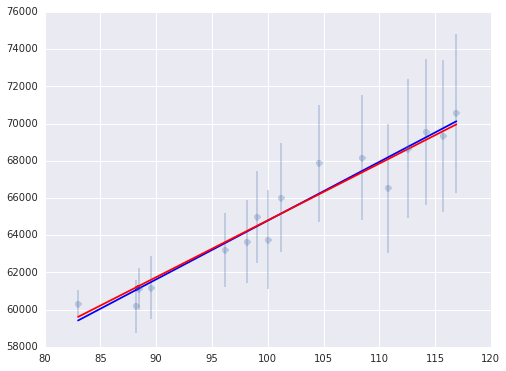

In [94]:
x = longley['GNPDEFL']
y_real = longley['TOTEMP']

#scatter(x, y_real)
plt.figure(figsize=(8,6))
plt.plot(x, res2.fittedvalues, 'b')
plt.plot(x, res3.fittedvalues, 'r')
incertezze = 1.0/pesi
plt.errorbar(x, y_real, incertezze, fmt='o', alpha=0.3)

Riprendiamo ora in considerazioni il dataset sulle relazione extraconiugali per vedere un esempio di OLS utilizzata per fare l'ANOVA in sue varie accezioni.

Rivediamo per prima cosa quali erano le variabili a nostra disposizione:

In [95]:
print(affair.columns.values)

['rate_marriage' 'age' 'yrs_married' 'children' 'religious' 'educ'
 'occupation' 'occupation_husb' 'affairs' 'cheated']


Effettuiamo ora una ANOVA ad una via fra coloro che hanno avuto una relazione extraconiugale in funzione del livello percepito del rapporto.

In [96]:
smf.ols('affairs ~ rate_marriage', data=affair, subset=affair.cheated).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                affairs   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     3.078
Date:                Fri, 30 Oct 2015   Prob (F-statistic):             0.0154
Time:                        10:03:48   Log-Likelihood:                -5441.3
No. Observations:                2053   AIC:                         1.089e+04
Df Residuals:                    2048   BIC:                         1.092e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------------
Intercept                        1.6076      0.399      4.031      0.000         0.826     2.390
rate_marriage[T.2 poor]          0.9366      0.461      2.033      0.042         0.033     1.840
rate_marriage[T.3 fair]          0.8817      0.425      2.075      0.038         0.048     1.715
rate_marriage[T.4 good]          0.4821      0.419      1.152      0.250        -0.339     1.303
rate_marriage[T.5 very good]     0.3112      0.428      0.727      0.467        -0.528     1.151
==============================================================================
Omnibus:                     2366.549   Durbin-Watson:                   1.941
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           290965.709
Skew:                           5.811   Prob(JB):                         0.00
Kurtosis:                      60.152   Cond. No.                         13.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Questo modello risulta significativo, ma la descrizione in termini di controllo e trattamente risulta piuttosto innaturale; Possiamo in modo semplice spiegare a statsmodels che deve interpretare le categorie di **rate_marriage** non come trattamenti rispetto ad un controllo base ma come incrementi successivi rispetto ad un livello base. Il modello complessivo non viene modificato (la varianza descritta è esattamente la stessa), ma la sua interpretazione risulta molto più naturale

In [97]:
smf.ols('affairs ~ C(rate_marriage, Diff)', data=affair, subset=affair.cheated).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                affairs   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     3.078
Date:                Fri, 30 Oct 2015   Prob (F-statistic):             0.0154
Time:                        10:03:52   Log-Likelihood:                -5441.3
No. Observations:                2053   AIC:                         1.089e+04
Df Residuals:                    2048   BIC:                         1.092e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------------------------
Intercept                                 2.1300      0.105     20.337      0.000         1.925     2.335
C(rate_marriage, Diff)[D.1 very poor]     0.9366      0.461      2.033      0.042         0.033     1.840
C(rate_marriage, Diff)[D.2 poor]         -0.0549      0.273     -0.201      0.841        -0.591     0.481
C(rate_marriage, Diff)[D.3 fair]         -0.3996      0.194     -2.056      0.040        -0.781    -0.018
C(rate_marriage, Diff)[D.4 good]         -0.1709      0.201     -0.850      0.395        -0.565     0.223
==============================================================================
Omnibus:                     2366.549   Durbin-Watson:                   1.941
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           290965.709
Skew:                           5.811   Prob(JB):                         0.00
Kurtosis:                      60.152   Cond. No.                         6.88
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Il valore di ciascun gruppo rappresenta la differenza fra il valore di quel gruppo d il successivo. Per dimostrarlo calcoliamo esplicitamente queste differenze. Il valore dell'intercetta è dato dalla *Grand Mean* del sistema (ovvero la media delle medie dei gruppi, quantità usata in quanto più robusta a campionamenti non rappresentativi della popolazione).

In [98]:
group_mean = affair[affair.cheated].groupby('rate_marriage')['affairs'].mean()
print(group_mean)
print("grand mean", group_mean.mean())
group_mean.values[1:] - group_mean[:-1]

rate_marriage
1 very poor    1.607641
2 poor         2.544251
3 fair         2.489364
4 good         2.089758
5 very good    1.918888
Name: affairs, dtype: float64
grand mean 2.12998043333


rate_marriage
1 very poor    0.936609
2 poor        -0.054887
3 fair        -0.399606
4 good        -0.170870
Name: affairs, dtype: float64

Siamo ora interessati a studiare l'effetto combinato del livello di relazione e del livello di religiosità, considerati in modo indipendente, ovvero usando l'operatore di somma fra variabili.

In [99]:
model = 'affairs ~ C(rate_marriage, Diff) + C(religious, Diff)'
smf.ols(model, data=affair, subset=affair.cheated).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                affairs   R-squared:                       0.027
Model:                            OLS   Adj. R-squared:                  0.024
Method:                 Least Squares   F-statistic:                     8.225
Date:                Fri, 30 Oct 2015   Prob (F-statistic):           6.40e-10
Time:                        10:04:05   Log-Likelihood:                -5419.0
No. Observations:                2053   AIC:                         1.085e+04
Df Residuals:                    2045   BIC:                         1.090e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------------------------
Intercept                                 2.0671      0.122     16.945      0.000         1.828     2.306
C(rate_marriage, Diff)[D.1 very poor]     0.8843      0.456      1.938      0.053        -0.011     1.779
C(rate_marriage, Diff)[D.2 poor]         -0.0634      0.271     -0.234      0.815        -0.594     0.468
C(rate_marriage, Diff)[D.3 fair]         -0.3778      0.192     -1.963      0.050        -0.755    -0.000
C(rate_marriage, Diff)[D.4 good]         -0.2161      0.200     -1.082      0.279        -0.608     0.175
C(religious, Diff)[D.1 not]              -1.0247      0.206     -4.964      0.000        -1.430    -0.620
C(religious, Diff)[D.2 mildly]           -0.2284      0.175     -1.308      0.191        -0.571     0.114
C(religious, Diff)[D.3 fairly]           -0.5284      0.337     -1.570      0.117        -1.188     0.132
==============================================================================
Omnibus:                     2334.659   Durbin-Watson:                   1.938
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           274765.044
Skew:                           5.686   Prob(JB):                         0.00
Kurtosis:                      58.522   Cond. No.                         7.03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Questo modello però non ci soddisfa. Decidiamo allora di vedere se esistono interazioni di qualche tipo fra queste due categorie, ovvero se vi sia una combinazione di effetti che porta le due variazioni a non essere indipendenti.

In [100]:
model = 'affairs ~ rate_marriage * religious'
res = smf.ols(model, data=affair, subset=affair.cheated).fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                affairs   R-squared:                       0.033
Model:                            OLS   Adj. R-squared:                  0.024
Method:                 Least Squares   F-statistic:                     3.679
Date:                Fri, 30 Oct 2015   Prob (F-statistic):           1.34e-07
Time:                        10:04:09   Log-Likelihood:                -5412.8
No. Observations:                2053   AIC:                         1.087e+04
Df Residuals:                    2033   BIC:                         1.098e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------------------------------------
Intercept                                                2.0012      0.980      2.042      0.041         0.079     3.924
rate_marriage[T.2 poor]                                  2.6181      1.118      2.343      0.019         0.426     4.810
rate_marriage[T.3 fair]                                  1.8534      1.032      1.795      0.073        -0.171     3.878
rate_marriage[T.4 good]                                  0.6761      1.024      0.660      0.509        -1.333     2.685
rate_marriage[T.5 very good]                             0.5191      1.030      0.504      0.614        -1.500     2.538
religious[T.2 mildly]                                   -0.1389      1.172     -0.119      0.906        -2.437     2.159
religious[T.3 fairly]                                   -0.7002      1.166     -0.601      0.548        -2.986     1.586
religious[T.4 strongly]                                 -0.9848      1.807     -0.545      0.586        -4.530     2.560
rate_marriage[T.2 poor]:religious[T.2 mildly]           -2.1393      1.333     -1.605      0.109        -4.753     0.474
rate_marriage[T.3 fair]:religious[T.2 mildly]           -1.3569      1.237     -1.097      0.273        -3.782     1.068
rate_marriage[T.4 good]:religious[T.2 mildly]           -0.4500      1.224     -0.368      0.713        -2.851     1.951
rate_marriage[T.5 very good]:religious[T.2 mildly]      -0.6030      1.242     -0.485      0.628        -3.040     1.834
rate_marriage[T.2 poor]:religious[T.3 fairly]           -2.0657      1.345     -1.536      0.125        -4.703     0.572
rate_marriage[T.3 fair]:religious[T.3 fairly]           -1.1602      1.235     -0.939      0.348        -3.583     1.262
rate_marriage[T.4 good]:religious[T.3 fairly]           -0.0828      1.222     -0.068      0.946        -2.480     2.314
rate_marriage[T.5 very good]:religious[T.3 fairly]      -0.0241      1.234     -0.020      0.984        -2.444     2.396
rate_marriage[T.2 poor]:religious[T.4 strongly]         -2.4540      2.170     -1.131      0.258        -6.709     1.801
rate_marriage[T.3 fair]:religious[T.4 strongly]         -1.3498      1.935     -0.698      0.485        -5.144     2.445
rate_marriage[T.4 good]:religious[T.4 strongly]         -0.2981      1.909     -0.156      0.876        -4.042     3.446
rate_marriage[T.5 very good]:religious[T.4 strongly]    -0.3855      1.928     -0.200      0.842        -4.166     3.395
==============================================================================
Omnibus:                     2331.882   Durbin-Watson:                   1.932
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           278923.061
Skew:                           5.666   Prob(JB):              

La lista delle interazione è colossale, ma con un pò di tempo sarebbe possibile leggerle tutte e ricercare quali siano significative e quali no. Il problema è che facendo una serie di test a tappeto in questa maniera (stiamo testando 20 differenti ipotesi), inizia ad esserci il rischio concreto di osservare dei p-value che risultino significativi per puro caso.

Per ovviare a questo è possibile utilizzare un metodo di correzione di questi p-value che tenga conto del numero di test contemporanei effettuati e ne modifichi il valore in modo da poter continuare ad utilizzare una soglia di significatività al 5%.

Questa correzione in statsmodels è effettuata tramite la funzione multitest

In [101]:
from statsmodels.api import stats
adj_pvalues = stats.multipletests(res.pvalues)[1]
pd.Series(adj_pvalues, index=res.pvalues.index).order()

/usr/local/lib/python3.4/dist-packages/ipykernel/__main__.py:3: FutureWarning: order is deprecated, use sort_values(...)
  app.launch_new_instance()


rate_marriage[T.2 poor]                                 0.322076
Intercept                                               0.551541
rate_marriage[T.3 fair]                                 0.743177
rate_marriage[T.2 poor]:religious[T.2 mildly]           0.858389
rate_marriage[T.2 poor]:religious[T.3 fairly]           0.881395
rate_marriage[T.2 poor]:religious[T.4 strongly]         0.988669
rate_marriage[T.3 fair]:religious[T.2 mildly]           0.988669
rate_marriage[T.3 fair]:religious[T.3 fairly]           0.996131
religious[T.4 strongly]                                 0.999656
rate_marriage[T.4 good]:religious[T.2 mildly]           0.999656
rate_marriage[T.5 very good]:religious[T.2 mildly]      0.999656
rate_marriage[T.5 very good]                            0.999656
rate_marriage[T.4 good]                                 0.999656
rate_marriage[T.3 fair]:religious[T.4 strongly]         0.999656
religious[T.3 fairly]                                   0.999656
religious[T.2 mildly]    

Come possiamo vedere la correzione per i test multipli ha distrutto praticamente tutte le significatività a parte quella del gruppo dei non religiosi.

Questo è un fenomeno molto comune quando si analizzano modelli molto complicati: aumentando il numero delle componenti prese in esame, la loro importanza nel modello complessivo diminuisce fino a perdersi in mezzo al rumore.

----
# Scikits.learn - Machine learning

http://scikit-learn.org

Scikits.learn è forse la libreria fra quelle che vedremo oggi più attivamente sviluppata e con il maggior numero di collaboratori, e l'ampiezza di questa libreria si può facilmente intuire dalle dimensioni del suo manuale, che ha superato le 1000 pagine qualche mese fà.

Quella che segue è quindi ovviamente lungi dall'essere anche soltanto una panoramica completa, vuole solo essere un antipasto per far venire la curiosità di approfondire le sue potenzialità.

In [102]:
import sklearn
print(sklearn.__version__)
from sklearn import datasets, svm

0.16.1


Per iniziare a sperimentare ci cimentiamo con un problema di classificazione, ovvero del corretto riconoscimente della categoria di appartenenza di un oggetto data una serie di features. 

Giocheremo con uno dei dataset inclusi nella libreria, contenente delle immagini (64x64) di cifre scritte a mano. Ciò che vogliamo fare è costruire un semplice predittore che data l'immagine riconosca in modo più o meno corretto la cifra scritta.

etichette da classificare: 1797
feature disponibili: (1797, 64)
ultima etichetta: 8
forma del numero:


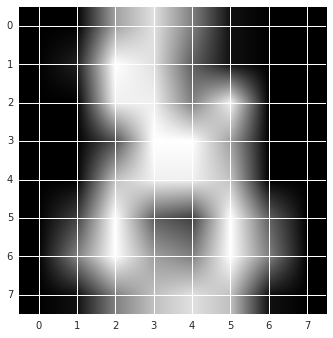

In [103]:
digits = datasets.load_digits()
data = digits['data']
target = digits['target']
print("etichette da classificare:", len(target))
print("feature disponibili:", data.shape)
print("ultima etichetta:", target[-1])
print("forma del numero:")
plt.imshow(data[-1].reshape(8,8),cmap='gray');

Come possiamo vedere anche per un essere umano il compito di riconoscere di che cifra si tratti non è banale.

Classificheremo le nostre cifre tramite una Support Vector Machine (SVC). Tutti i classificatori espongono la stessa sintassi di base, simile a quanto già visto in precedenza su statsmodels: Una volta creato il modello ne faccio il fit su una serie di dati di training, per poi predire la categoria dei dati di test.

In machine learning è infatti fondamentale ricordare di mantenere una parte del proprio dataset da parte per poter verificare che il nostro predittore sia in grado di classificare dei dati mai visti, sia ovvero in grado di generalizzare l'informazione contenuta nei dati di training.

In [104]:
clf = svm.SVC(gamma=0.001, C=100.)
clf.fit(data[:-1], target[:-1])
print(clf.predict(data[-1]))

[8]


----
## cross validation

La maniera migliore per valutare la performance del nostro classificatore è valutare che percentuale dei dati di test classifica correttamente. Ripetere questa operazione più volte permette di ottenere la **cross validation**, che è il valore solitamente fornito per indicare la qualità della macchina.

In [105]:
svc = svm.SVC(C=1, kernel='linear')
svc.fit(data[:-100], target[:-100]).score(data[-100:], target[-100:])

0.97999999999999998

Per fare questa operazione tediosa in modo automatico Scikits.learn fornisce la classe KFold, che crea una lista di possibili divisioni del dataset in training e test.

In [150]:
from sklearn import cross_validation
#questo equivale ad un leave one out cross validation
k_fold = cross_validation.KFold(n=6, n_folds=6)
#stampami gli indici del train e test set
for train_indices, test_indices in k_fold:
    print('Train: %s | test: %s' % (train_indices, test_indices))

Train: [1 2 3 4 5] | test: [0]
Train: [0 2 3 4 5] | test: [1]
Train: [0 1 3 4 5] | test: [2]
Train: [0 1 2 4 5] | test: [3]
Train: [0 1 2 3 5] | test: [4]
Train: [0 1 2 3 4] | test: [5]


Iterando sugl indici ritornati da KFold permette di fare in maniera più comoda la cross validation.

In [151]:
k_fold = cross_validation.KFold(n=len(data), n_folds=10)
for train, test in k_fold:
    svc_fit = svc.fit(data[train], target[train])
    print(svc_fit.score(data[test], target[test]))

0.938888888889
0.994444444444
0.933333333333
0.966666666667
0.961111111111
0.988888888889
0.966666666667
0.988826815642
0.932960893855
0.966480446927


Una funzione ancorà più utile è **cross_val_score**, che effettua automaticamente la cross validation con lo schema indicato sulla macchina che ci interessa. in questa maniera verificarne le performance si riduce ad una chiamata di funzione.

In [148]:
k_fold = cross_validation.KFold(n=len(data), n_folds=10)

results = cross_validation.cross_val_score(svc, data, target, cv=k_fold, n_jobs=-1)

print(results)
print(plt.mean(results))

[ 0.93888889  0.99444444  0.93333333  0.96666667  0.96111111  0.98888889
  0.96666667  0.98882682  0.93296089  0.96648045]
0.963826815642


----
## feature reduction

Molto spesso il numero di features a disposizione è estremamente maggiore del necessario e buona parte di esse non contiene che rumore. Per risolvere questo problema esistono le tecniche di feature reduction. Fra queste la più famosa è sicuramente la Principal Component Analysis, che cerca di descrivere la direzione di massima sparsità dei dati in termini di combinazioni lineari delle features.

Il risultato della PCA è un nuovo set di features formato da una combinazione lineare delle precedenti, ordinate in base alla loro capacità di spiegare la variabilità osservata nei dati.

Vediamo un semplice esempio: creo un dataset con tre features, di cui la terza è semplicemente la combinazione delle due precedenti e non contiene quindi nessuna nuova informazione

(200, 3)


/home/PERSONALE/enrico.giampieri2/.local/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


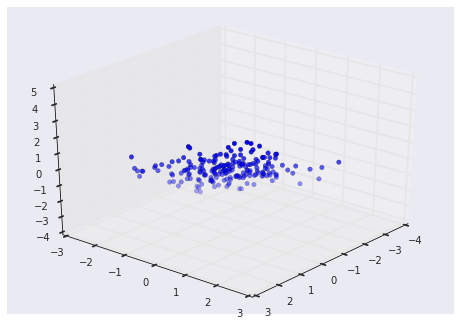

In [160]:
# Create a signal with only 2 useful dimensions
x1 = plt.randn(200)
x2 = plt.randn(200)
x3 = x1 + x2 + plt.randn(200)*0.01
X = plt.c_[x1, x2, x3]
print(X.shape)

from mpl_toolkits.mplot3d import Axes3D
ax = plt.figure().add_subplot(111, projection='3d')
ax.view_init(None,40)
ax.scatter(x1, x2, x3);

Utilizzo la PCA come tutti i modelli finora, tramite un fit sui dati. Un'indicazione del risultato è poi contenuta nella variabile interna del classificatore chiamata **explained\_variance\_ratio\_**. Questa indica la percentuale di varianza spiegata da ciascuna delle nuove componenti della PCA.

In [161]:
from sklearn import decomposition
pca = decomposition.PCA()
pca.fit(X)
#questo mi dice ciascuna componente quanta parte della varianza mi descrive
print(pca.explained_variance_ratio_  )

[  7.71018183e-01   2.28973869e-01   7.94812244e-06]


Posso poi usare la mia PCA per trasformare dei dati (in questo caso gli stessi di partenza, ma in generale saranno diversi) dalle features iniziali a quelle calcolate con la PCA

In [162]:
# As we can see, only the 2 first components are useful
pca.n_components = 2
X_reduced = pca.fit_transform(X)
print(X_reduced.shape)

(200, 2)


Posso quindi applicare lo stesso principio ai dati visti in precedenza sulle digit. Faccio un plot della varianza spiegata da ciascuna feature, potendo così decidere quante di queste tenere. 

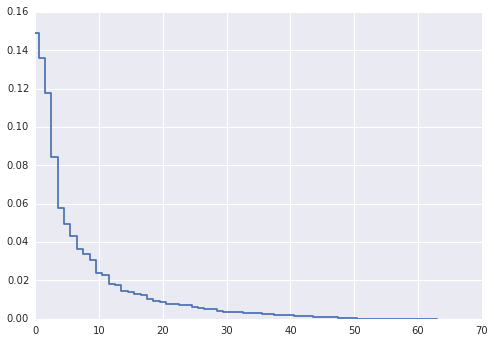

In [163]:
pca = decomposition.PCA()
pca.fit(data)
plt.plot( pca.explained_variance_ratio_, linestyle='steps-mid');

scegliamo solo le prime 10 componenti e usiamole per la classificazione

In [164]:
pca.n_components = 10
data_reduced = pca.fit_transform(data)

kfold = cross_validation.KFold(n=len(data_reduced), n_folds=10)
cvscore = cross_validation.cross_val_score
results = cvscore(svc, data_reduced, target, cv=kfold, n_jobs=-1)
print(results)
print(plt.mean(results))

[ 0.92222222  0.93333333  0.9         0.91111111  0.93888889  0.97777778
  0.91666667  0.93296089  0.88268156  0.92178771]
0.92374301676


In generale è necessario prestare attenzione alla normalizzazione dei dati: infatti feature con media e varianza superiore alle altre domineranno il calcolo della varianza senza per questo contenere un maggior contenuto informativo. È buona norma quindi lavorare non con le features originali ma con delle features intermedie ottenute normalizzando quelle di partenza.

----
# Ottimizzazione dei parametri

Un altro dilemma comune è la scelta dei parametri. Per farlo è normalmente necessario provare una serie di valori plausibili dei parametri e vedere per quali ho la miglior classificazione valutata tramite cross validation. Come potrete intuire, anche questa procedura, essendo concettualmente semplice e molto ripetitiva, è particolarmente adatta ad essere automatizzata.

In questo caso la classe di riferimento è GridSearchCV. Per sperimentare un pò con questa classe utilizziamo il famoso dataset *Iris*, che contiene le caratteristiche di vari tipi di fiori in termini di lunghezza del petalo, del pistillo, etc..

In [122]:
from sklearn import svm, grid_search, datasets
iris = datasets.load_iris()

Scegliamo ora quale sia il parametro che vogliamo ottimizzare ed il range di parametri su cui vogliamo fare l'ottimizzazione. Se più parametri vengono passati verrà controllato l'intero spazio dei parametri descritto dal prodotto cartesiano dei valori forniti.

Il parametro scelto, **C**, rappresenta una penalizzazione sull'errore compiuto dalla macchina, che esploriamo dal valore di 0.1 al valore di 2.0 a step di 0.1.

In [124]:
param = {'C': plt.arange(0.1, 2, 0.1)}

La gridsearch richiede soltanto il classificatore che desideriamo usare (una support vector regression machine) ed il parametro che vogliamo caratterizzare.

In [125]:
svr = svm.SVR()
clf = grid_search.GridSearchCV(svr, param)
clf.fit(iris.data, iris.target)
clf.best_params_

{'C': 0.10000000000000001}

Molti metodi implementano una propria versione ottimizzata della grid search, ed è quindi possibile ottenere risultati superiori e più rapidi.

Questo metodo è particolarmente utile in combinazione con La classe Pipeline, che crea un unico super-predittore a partire da una serie di predittori, i cui risultati vengono dati uno in pasto all'altro in sequenza, permettendo di ottimizzare l'intera sequenza invece che le singole componenti.

In [166]:
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.grid_search import GridSearchCV

estimators = [('scaling', StandardScaler()),('reduce_dim', PCA()), ('svm', SVC())]
clf = Pipeline(estimators)

In [167]:
clf.set_params(svm__C=10)
params = dict(reduce_dim__n_components=[1, 2, 3, 4], svm__C=[0.1, 10, 100])
grid_search = GridSearchCV(clf, param_grid=params)

In [168]:
grid_search.fit(iris.data, iris.target)
grid_search.best_params_

{'reduce_dim__n_components': 4, 'svm__C': 10}

----
# PyMC - Statistica Bayesiana tramite simulazioni MonteCarlo

https://github.com/pymc-devs/pymc

PyMC è una libreria che implementa la statistica bayesiana tramite simulazioni MonteCarlo, ed è quella che trovo più affascinante fra quelle mostrate in questa lezione.

Un ottimo libro introduttivo (in inglese) alla statistica bayesiana ed a PyMC si trova all'indirizzo:

https://github.com/CamDavidsonPilon/Probabilistic-Programming-and-Bayesian-Methods-for-Hackers

Tramite PyMC è possibile descrivere ad alto livello il nostro modello in termini di distribuzioni di probabilità ed ottenere da queste una stima delle distribuzioni a posteriori dopo le osservazioni compiute.

In [ ]:
import pymc
from pymc.Matplot import plot as Mplot

Vediamo ora un esempio minimale: Dato un processo che immaginiamo essere descrivibile da una distribuzione di Poisson, stimare la media di questa distribuzione a partire da una osservazione.

Per far questo dobbiamo creare una distribuzione che rappresenta la nostra conoscenza a priori del valore della media, che rappresentiamo con una distribuzione uniforme estremamente ampia ad indicare la nostra mancanza di informazioni iniziali. 

Dopo di questa definiamo i nostri dati osservati come una distribuzione di Poisson di cui si sono fatte delle certe osservazioni. Questa distribuzione è caratterizzata da una media che è data dalla distribuzione di cui prima.

PyMC simulerà il sistema per un numero di step a nostra scelta ed a partire da questa stimerà la distribuzione di probabilità della media dopo la nostra osservazione.

In [ ]:
mean = pymc.Uniform('mean', lower=0.0, upper=100.0)

observed = pymc.Poisson('observed', mu=mean, value=12, observed=True)

model = pymc.MCMC([mean, observed])

model.sample(iter=8000)

Dopo la simulazione abbiamo accesso a tutti i valori assunti dal nostro parametro, che rappresentano la distribuzione desiderata.

In [ ]:
print model.stats()['mean']['mean']
hist(model.trace('mean')[:], bins=30);

Abbiamo anche a disposizione una funzione che ci permette di controllare se il modello è arrivato effettivamete a convergenza oppure no. Un modello a convergenza ha una traccia sostanzialmente di rumore piatto ed una funzione di autocorrelazione estremamente ristretta, mentre una non convergente avrà dei trend visibili nella traccia e la funzione di autocorrelazione sarà molto ampia.

In caso è possibile dare un valore di partenza specificato per la simulazione, in modo da favorire la convergenza.

In [ ]:
Mplot(model)

----
##fitto una distribuzione gaussiana

Il passaggio successivo è il fit di un set di osservazioni, e non solo di una. in questo caso avremo bisogno di specificare una distribuzione per ogni dato (almeno in linea teorica), ma nel caso tutti di dati debbano seguire la stessa distribuzione possiano continuare ad usare un solo parametro.

In questo caso faremo il fit di una distribuzione gaussiana con varianza nota a priori (per limitare il numero di parametri da descrivere in questa sede)

In [ ]:
data = randn(100)+100.0
hist(data);

In [ ]:
# distribuzione sul parametro da trovare, la media
mean = pymc.Uniform('mean', lower=min(data), upper=max(data))

# il processo che crea i miei dati è una gaussiana con 
# precisione fissata e media stocastica
process = pymc.Normal('process', mu=mean, tau=1.0, value=data, observed=True)
model_ = pymc.Model([data, mean, process])

In [ ]:
#creo il mio modello e lo simulo tramite un algoritmo di montecarlo
model = pymc.MCMC(model_)
model.sample(iter=10000)

In [ ]:
Mplot(model)

----
##esempio di diagnosi

ho una certa diffusione di un carattere genetico nella popolazione (che chiamerò $p$). Questo carattere genetico modifica la conta di cellule bianche nel sangue: se è presente ne conto in media 30, mentre se è assente soltanto 10. Data un'osservazione di 15 globuli bianchi, quale sarà la probabilità di avere la malattia?

Devo tener conto della diffusione a priori del gene nella popolazione per poterlo valutare! Se sappiamo che nella popolazione solo il $10\%$ possiede il gene mutante, ed ho un'incertezza del $\pm 5\%$, posso rappresentare la mia conoscenza a priori con una distribuzione Beta con parametri $a=3.5$ e $b=31.5$. Il valore di questi parametri è stato fatto invertendo le formule di media e varianza della distribuzione Beta.

In [ ]:
# questo rappresenta la frequenza nella popolazione, 
#non mi aspetto che cambi con una sola osservazione
frequenza = pymc.Beta('frequenza', alpha=3.5 , beta=31.5, value=0.5)

# questo rappresenta il fatto che il singolo individuo misurato 
# sia o meno una variante del gene
# se avessi più osservazioni dovrei avere una realizzazione per ogni osservazione!
gene_variante = pymc.Bernoulli('gene_variante', p=frequenza)

# questo mi dà la formula determistica che mi dice in base alla presenza del gene
# quale sia la media di conteggio che mi aspetto
@pymc.deterministic
def media(gene_variante=gene_variante):
    return where(gene_variante, 20.0, 10.0)

# il valore che realmente osservo
osservato = 17
# questa è la distribuzione della mia osservazione
# visto che mi aspetto che sia generato tramite un processo di poisson anche se
# è un data "fissato"
conteggio = pymc.Poisson('conteggio', mu=media, value=osservato, observed=True)

In [ ]:
#costruisco il modello e lo simulo
model = pymc.MCMC([frequenza, gene_variante, media, conteggio])
model.sample(iter=4000, burn=500)

stats_gene = model.stats()['gene_variante']
print
s = "probabilità di avere la variante del gene: {:.1f} +/- {:.1f}"
print s.format(stats_gene['mean'], stats_gene['standard deviation'])

----
##fit di un burst proteico

Passiamo ad un modello più comlicato, in cui abbiamo due possibili distribuzione che coesistono per descrivere gli stessi dati.

Voglio descrivere il numero di proteine osservate in un burst di produzione. In generale ho una probabilità che il DNA sia aperto e produca proteine con una certa media, o sia chiuso e non ne produca affatto. Vogliamo determinare quale sia questa probabilità dato un certo numero di osservazioni. Per prima cosa generiamo dei dati sintetici per testare il nostro algoritmo.

Quello che vogliamo stimare è la probabilità di apertura del DNA e quale sia la dimensione del burst proteico in caso di apertura.

In [ ]:
#genero dei dati sintetici
N = 10
real_p = 0.9
real_lambda = 2.0
DNA = np.random.random(size=N)<real_p
proteins = DNA * np.random.poisson(real_lambda, size=N)
hist(proteins, bins=linspace(min(proteins), max(proteins)),rwidth=500);

Le nostre ipotesi di partenza sono una totale ignoranza del valore di probabilità di apertura (rappresentato da una distribuzione uniforme) ed una certa convinzione che la dimensione del burst sia limitata superiormente (rappresentato da una distribuzione esponenziale con media 10).

In [ ]:
#descrivo il modello

#probabilità di apertura
p_open = pymc.Uniform('p', lower=0.0, upper=1.0)
switch = pymc.Bernoulli('switch', p_open, size=len(proteins))
# dimensione del burst proteico in caso di apertura
burst_n = pymc.Exponential('burst', 0.1)

# in base all'apertura seleziono la media giusta
# in caso di chiusura la metto piccola ma non zero per evitare problemi numerici
@pymc.deterministic
def mu(switch=switch, burst_n=burst_n):
    return where(switch, burst_n,1e-5)

observed = pymc.Poisson('observed', mu=mu, value=proteins, observed=True)

In [ ]:
model = pymc.MCMC([p_open, burst_n, switch, mu, observed])
model.sample(iter=20000, burn=5000)

In [ ]:
stats = model.stats()
print real_p, '\t',stats['p']['mean'], '+/-', stats['p']['standard deviation']
sb = stats['burst']
print real_lambda, '\t', sb['mean'], '+/-', sb['standard deviation']

Possiamo vedere come solo con 10 osservazioni abbiamo una stima abbastanza accurata dei nostri parametri.

In [ ]:
Mplot(model)

----
##fit di una mixture di distribuzioni di tipi differenti (esponenziale e gaussiana)

Quest'ultimo esempio serve a rappresentare un caso in cui i dati sono descrivibili da due distribuzioni di tipo completamente diverso (e non come prima da due distribuzioni identiche ma con parametri diversi). In questo caso dovrò dire a pymc come mi aspetto di combinare queste due distribuzioni.

Questo modello sarebbe quasi impossibile da affrontare con la statistica inferenziale classica, ma si rivela solo marginalmente più complesso dei precedenti una volta descritto nel framwork della statistica bayesiana.

In [ ]:
#genero i dati sintetici
N = 200
data = r_[ np.random.exponential(1.0, size=N), np.random.normal(10.0, 1.0, size=3*N) ]
hist(data, bins=30);

In [ ]:
import scipy.stats as st

# selezione casuale del processo di generazione
dist_switch = pymc.Uniform('dist_switch', lower=0.0, upper=1.0)
switch = pymc.Bernoulli('switch', dist_switch, size=len(data), plot=False)

# parametri della distribuzione esponenziale e di quella gaussiana
exp_beta = pymc.Exponential('exp_beta', 0.1)
mean = pymc.Exponential('mean', 0.1)
deviation = pymc.Exponential('deviation', 0.1)

#deve ritornare la log-probability complessiva di osservare il valore dati i genitori
@pymc.stochastic(observed=True)
def observed(switch=switch, exp_beta=exp_beta, mean=mean, 
        deviation=deviation, value=data):
    # calcolo la log probabilità se fossero tutte esponenziali
    exponential_logpdf = st.expon.logpdf(value, scale=exp_beta)
    # calcolo la log probabilità se fossero tutte gaussiane
    normal_logpdf = st.norm.logpdf(value, loc=mean, scale=deviation)
    # selezioni in base alla variabile di selezione switch
    total_logpdf = np.where(switch, exponential_logpdf, normal_logpdf)
    # ritorno la somma delle log-pdf
    return np.sum(total_logpdf)    

In [ ]:
model = pymc.MCMC([dist_switch, switch, exp_beta, mean, deviation, observed])
model.sample(iter=4000, burn=1500)

In [ ]:
Mplot(model)

----
#Il problema della calibrazione

In questo caso voglio risolvere il problema inverso a quello del fit lineare: data una stima dei valori della variabile dipendente voglio ricavare una stima dei valori di quella indipendente.

In [ ]:
m = 2.0
a = 2.0
q = 2.0
n = 1.0

x = arange(0.0, 10.0, 2.0)
y = q + m*x**a + n*randn(len(x))
scatter(x, y)

In [ ]:
exog = pymc.Uniform('exogenous', -2, 10, size=len(y))

@pymc.deterministic(plot=False)
def mean(exog=exog):
    return q + m*abs(exog)**a

endog = pymc.Normal('endog', mu=mean, tau = 1.0/n**2, value=y, observed=True)

In [ ]:
model = pymc.MCMC([exog, mean, endog])
model.sample(iter=100000, burn=10000)

In [ ]:
x_hat = model.stats()['exogenous']['mean']
y_hat =  q + m*x_hat**a

In [ ]:
scatter(x_hat, y_hat, color='r', s=50, alpha=0.5)
plot(x_hat, y_hat, color='r', alpha=0.5)
scatter(x,y, color='b');

In [ ]:
Mplot(model)

----
#RPy2 - quando python non basta

http://rpy.sourceforge.net/rpy2/doc-2.3/html/index.html

http://rpy.sourceforge.net/rpy2/doc-2.3/html/introduction.html

rpy2:

- C-level interface between Python and R (R running as an embedded process)
- R objects exposed to Python without the need to copy the data over
- Conversely, Python's numpy arrays can be exposed to R without making a copy
- Low-level interface (close to the R C-API) and high-level interface (for convenience)
- In-place modification for vectors and arrays possible
- R callback functions can be implemented in Python
- Possible to have anonymous R objects with a Python label
- Python pickling possible
- Full customization of R's behavior with its console (so possible to implement a full R GUI)

In [ ]:
from rpy2.robjects import r
from rpy2 import robjects
r['pi'][0]
r('library(datasets)')
com.convert_robj(r('mtcars'))
robjects.r('''
        f <- function(r, verbose=FALSE) {
            if (verbose) {
                cat("I am calling f().\n")
            }
            2 * pi * r
        }
        ''')
r_f = r['f']
print r_f(2)
#necessario per avere i plot interattivi!
import rpy2.rinterface as rinterface
import threading
import time
def r_refresh(interval = 0.03):
    while True:
        rinterface.process_revents()
        #time.sleep(interval)
t = threading.Timer(0.1, r_refresh)
t.start()

In [ ]:
r('x <- rnorm(100)')  # generate x at R
r('y <- x + rnorm(100,sd=0.5)')  # generate y at R
r('plot(x,y)');  # have R plot them
r('lmout <- lm(y~x)')  # run the regression
r('print(lmout)')  # print from R
loclmout = r('lmout') # download lmout from R to Python
print loclmout  # print locally
#print loclmout.r['coefficients']  # print one component

In [ ]:
u = range(10)  # set up another scatter plot, this one local
e = 5*[0.25,-0.25]
v = u[:]
for i in range(10): 
    v[i] += e[i]
r.plot(u,v)
r.assign('remoteu',u)  # ship local u to R
r.assign('remotev',v)  # ship local v to R
r('plot(remoteu,remotev)')  # plot there
r('x <- c(5.05, 6.75, 3.21, 2.66)')
r('y <- c(1.65, 26.5, -5.93, 7.96)')
r('plot(x, y, main="Example Scatter with regression")')
r('abline(lsfit(x, y)$coefficients, col="red")')

----
##convertire dataframe da e verso R

In [ ]:
from pandas import DataFrame
import pandas.rpy.common as com
from rpy2 import robjects
r = robjects.r

df = DataFrame({'A': [1, 2, 3], 'B': [4, 5, 6], 'C':[7, 8, 9]}, 
        index=["one", "two", "three"])

r.assign('my_dataframe', com.convert_to_r_dataframe(df))
r_dataframe = r['my_dataframe']
print r_dataframe

com.convert_robj(r_dataframe)

In [ ]:
infert = com.load_data('infert')
infert
from rpy2.robjects.packages import importr
importr("datasets")
r['mtcars']

----
style sheet for ipython notebook

In [ ]:
#questo snippet mi permette di usare una visualizzazione più carina
from IPython.core.display import HTML
def css_styling():
    styles = open("./styles/custom.css", "r").read()
    return HTML(styles)
css_styling()